필터링
  - 원하는 조건에 맞는 데이터만 추출
  - 조건에 맞는 경우를 true / false로 구분하고 해당 row만 추출

In [13]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
# 나이가 10대인 승객만 추출(10~19)
mask1 = (titanic['age'] >= 10) & (titanic['age'] < 20 )
df_teenage = titanic.loc[mask1,:]
df_teenage.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
14,0,3,female,14.0,0,0,7.8542,S,Third,child,False,NaN,Southampton,no,True
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
38,0,3,female,18.0,2,0,18.0000,S,Third,woman,False,NaN,Southampton,no,False


In [16]:
# 나이가 10세미만(0~9) 이고 여성인 승객만 추출
mask2 = (titanic.age<10) & (titanic.sex =='female')
df_female_under10 =  titanic.loc[mask2, :]
df_female_under10.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
24,0,3,female,8.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
43,1,2,female,3.0,1,2,41.5792,C,Second,child,False,NaN,Cherbourg,yes,False
58,1,2,female,5.0,1,2,27.7500,S,Second,child,False,NaN,Southampton,yes,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False


In [24]:
# 나이가 10세 미만 또는 60세 이상인 승객의 age, sex ,alone 열만 선택
mask3 = (titanic.age < 10) | (titanic.age >=60)
df_under10_morethan60 = titanic.loc[mask3, ['age','sex','alone'] ]
df_under10_morethan60.head()

,age,sex,alone
7,2.0,male,False
10,4.0,female,False
16,2.0,male,False
24,8.0,female,False
33,66.0,male,True


isin() 메소드 활용

In [ ]:
# 함께탑승한 형제 또는 배우자의 수가 3 4 5인 승객만 따로 추출
mask3 = titanic.sibsp == 3
mask4 = titanic.sibsp == 4
mask5 = titanic.sibsp == 5
df_boolean = titanic.loc[mask3|mask4|mask5, :]
df_boolean

In [ ]:
maskisin = titanic.sibsp.isin([3,4,5])
def_isin = titanic.loc[maskisin, : ]
def_isin

데이터 프레임 병합 merge
  - sql의 join과 비슷
  - concat은 단순히 연결
  - merge 키가되는 컬럼을 기준으로 같은 row끼리 묶는작업

In [31]:
import pandas as pd

In [32]:
df1 = pd.read_excel('/content/stock price.xlsx')
df2 = pd.read_excel('/content/stock valuation.xlsx')
print(df1.head())
print('\n')
print(df2.head())

       id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200


       id     name           eps     bps        per       pbr
0  130960   CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480       하림    274.166667    3551  11.489362  0.887074
2  138040  메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480      이마트  18268.166667  295780  13.931338  0.860437
4  145990      삼양사   5741.000000  108090  14.283226  0.758627


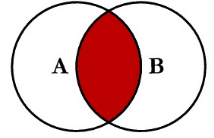

In [33]:
pd.merge(df1,df2,how='inner')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
2,145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
3,185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
4,204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


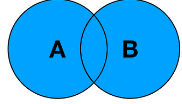

In [34]:
pd.merge(df1,df2,how='outer',on='id')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


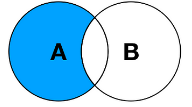